<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

Load the csv file and print the first five observations.

In [3]:
df=pd.read_csv('seeds_dataset.csv')
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0
1,12.13,13.73,5.394,3.745,5.220,0
2,14.86,14.67,5.678,3.258,5.351,0
3,15.69,14.75,5.527,3.514,5.046,0
4,19.94,16.92,6.675,3.763,6.550,1


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Consider the train-test split in the ratio 70:30 with random state = 1.

In [6]:
from sklearn.model_selection import train_test_split
X=df.drop('Type',axis=1)
y=df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot a decision tree for the model in the previous question and identify the seed type of the first observation in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=1,min_samples_leaf=5)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, random_state=100)

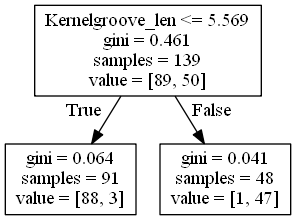

In [11]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

features = X.columns

dot_data = export_graphviz(DT, out_file=None, feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [15]:
y_pred=DT.predict(X_test)
y_pred[0]

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Select the optimal number for decision trees from the given list of values to build a random forest using entropy criterion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

no_of_trees = [6, 8, 10, 12, 14, 16]

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params = {'max_depth': [6, 8, 10, 12, 14, 16],
          'min_samples_split': [2,4,6,8,10,12,14],
          'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
          'criterion': ['entropy']}
gsearch = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=3, return_train_score=True)
gsearch.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [6, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
             return_train_score=True, scoring='roc_auc')

In [19]:
gsearch.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=2,
                       min_samples_split=14)

In [25]:
gsearch.estimator

RandomForestClassifier()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the most important variable in the random forest build with the optimal number of trees obtained in Q3
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
r=pd.DataFrame(rfc.feature_importances_,columns=['Value'],index=X.columns)
r

,Value
Area,0.269940
Perimeter,0.181276
Kernel_len,0.150109
Kernel_width,0.018828
Kernelgroove_len,0.379846


In [22]:
rfc = RandomForestClassifier(**gsearch.best_params_, random_state=4, oob_score=True)

rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=2,
                       min_samples_split=14, oob_score=True, random_state=4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which is the best criterion to build a decision tree for the given dataset?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 14}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a random forest containing ten trees and compute the precision and sensitivity of the model from the confusion matrix 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
rf = RandomForestClassifier()
params = {'max_depth': [ 10],
          'min_samples_split': [2,4,6,8,10,12,14],
          'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
          'criterion': ['entropy']}
gsearch = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=3, return_train_score=True)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
             return_train_score=True, scoring='roc_auc')

In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix


In [40]:
rfc = RandomForestClassifier(**gsearch.best_params_, random_state=4, oob_score=True)

rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print('Train - results')
print(confusion_matrix(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))
print(roc_auc_score(y_train, y_train_prob))
print('OOB Score-Train', rfc.oob_score_)

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('\n')
print('Test - results')
print(confusion_matrix(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_prob))

Train - results
[[88  1]
 [ 2 48]]
0.9784172661870504
0.9968539325842696
OOB Score-Train 0.9640287769784173


Test - results
[[37  2]
 [ 0 21]]
0.9666666666666667
0.9987789987789989


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the optimal depth of the decision tree from the given list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth_values = [3, 5, 7, 9]

In [41]:
rf = RandomForestClassifier()
params = {'max_depth': [3, 5, 7, 9],
          'min_samples_split': [2,4,6,8,10,12,14],
          'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
          'criterion': ['entropy']}
gsearch = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=3, return_train_score=True)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
             return_train_score=True, scoring='roc_auc')

In [42]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 8}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build and plot a decision tree with maximum 5 terminal nodes (use the entropy criterion)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
DT=DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3,min_samples_leaf=5,max_leaf_nodes=5)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=5, random_state=100)

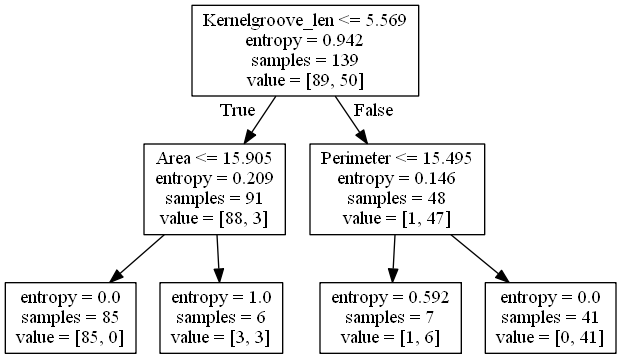

In [46]:
features = X.columns

dot_data = export_graphviz(DT, out_file=None, feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a random forest with entropy criterion such that each leaf node will contain at least three samples. Also calculate the f-1 score and accuracy of the model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
rf = RandomForestClassifier()
params = {'max_depth': [3, 5, 7, 9],
          'min_samples_split': [3],
          'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
          'criterion': ['entropy']}
gsearch = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=3, return_train_score=True)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [3]},
             return_train_score=True, scoring='roc_auc')

In [48]:
rfc = RandomForestClassifier(**gsearch.best_params_, random_state=4, oob_score=True)

rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print('Train - results')
print(confusion_matrix(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))
print(roc_auc_score(y_train, y_train_prob))
print('OOB Score-Train', rfc.oob_score_)

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('\n')
print('Test - results')
print(confusion_matrix(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_prob))

Train - results
[[88  1]
 [ 2 48]]
0.9784172661870504
0.9977528089887641
OOB Score-Train 0.9640287769784173


Test - results
[[37  2]
 [ 0 21]]
0.9666666666666667
0.9987789987789988


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Plot a decision tree with the optimal criterion such that it will contain no more than 4 terminal nodes and each terminal node will contain at least 5 observations  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
DT=DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3,min_samples_leaf=5,max_leaf_nodes=4)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4,
                       min_samples_leaf=5, random_state=100)

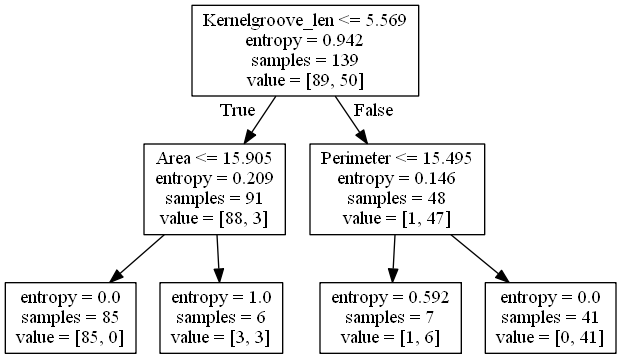

In [50]:
features = X.columns

dot_data = export_graphviz(DT, out_file=None, feature_names=features)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())